In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
!gdown --id 1T5dB-Q7qAJTl-CLoYdruzKSdO89ZezMy

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1T5dB-Q7qAJTl-CLoYdruzKSdO89ZezMy
To: /content/Titanic-Dataset.csv
100% 61.2k/61.2k [00:00<00:00, 56.6MB/s]


In [23]:
pd.read_csv ('/content/Titanic-Dataset.csv')
df=pd.read_csv ('/content/Titanic-Dataset.csv')

In [24]:
df[['Age', 'Cabin', 'Embarked']] = df[['Age', 'Cabin', 'Embarked']].fillna(df[['Age', 'Cabin', 'Embarked']].mean ())


<ipython-input-24-0338151e54f6>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df[['Age', 'Cabin', 'Embarked']] = df[['Age', 'Cabin', 'Embarked']].fillna(df[['Age', 'Cabin', 'Embarked']].mean ())


<ipython-input-25-fa54caadb05d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()
<ipython-input-25-fa54caadb05d>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

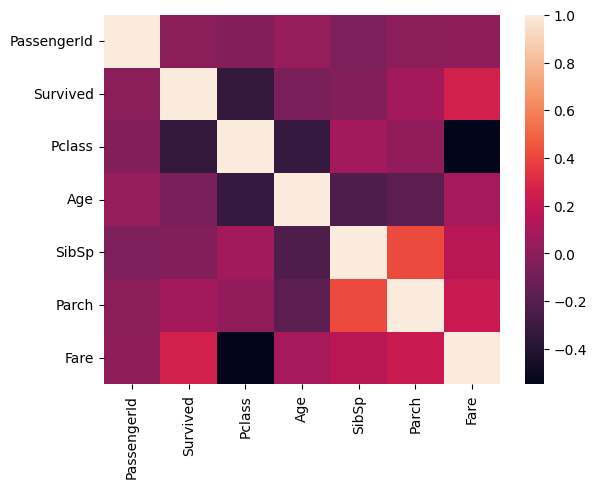

In [25]:
df.corr()
sns.heatmap(df.corr())


<Axes: xlabel='Pclass'>

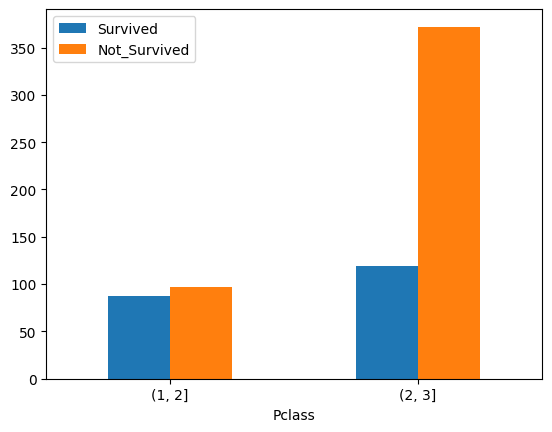

In [109]:
#Количество выживших и умерших в зависимости от класса круиза.
groups = df[df.Survived == 1].groupby(['Pclass', pd.cut(df.Pclass, [1, 2, 3])])
Survived = pd.DataFrame(groups.size().unstack().sum())
groups = df[df.Survived == 0].groupby(['Pclass', pd.cut(df.Pclass, [1, 2, 3])])
Not_Survived = pd.DataFrame(groups.size().unstack().sum())
Pclass_df = pd.merge(Survived, Not_Survived, on='Pclass')
Pclass_df.columns = ['Survived', 'Not_Survived']
Pclass_df['Pclass'] = Pclass_df.index.astype(str)
Pclass_df.plot(kind='bar', x ='Pclass', y =['Survived', 'Not_Survived'], rot=0)


<Axes: xlabel='Age'>

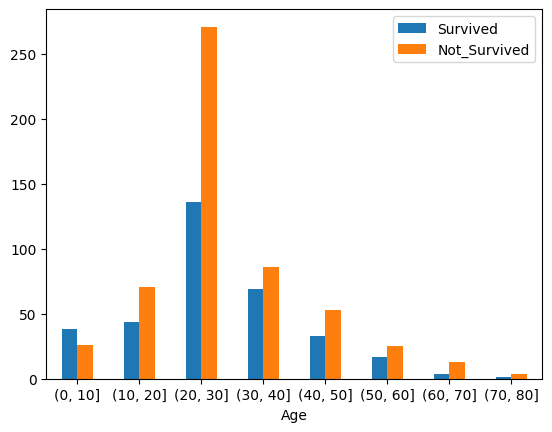

In [102]:
#Количество выживших и умерших в зависимости от возраста.
groups = df[df.Survived == 1].groupby(['Age',pd.cut(df.Age, [0, 10, 20, 30, 40, 50, 60, 70, 80])])
Survived = pd.DataFrame(groups.size().unstack().sum())
groups = df[df.Survived == 0].groupby(['Age',pd.cut(df.Age, [0, 10, 20, 30, 40, 50, 60, 70, 80])])
Not_Survived = pd.DataFrame(groups.size().unstack().sum())
age_df = pd.merge(Survived, Not_Survived, on='Age')
age_df.columns = ['Survived', 'Not_Survived']
age_df['Age'] = age_df.index.astype(str)
age_df.plot(kind='bar', x ='Age', y =['Survived', 'Not_Survived'], rot=0)

<Axes: xlabel='SibSp'>

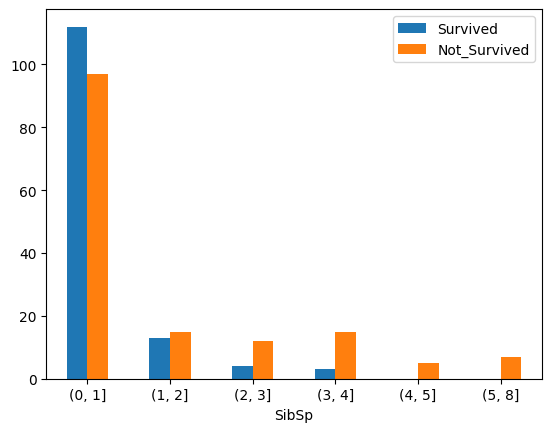

In [111]:
#Количество выживших и умерших в зависимости от числа братьев, сестер или супругов.
groups = df[df.Survived == 1].groupby(['SibSp',pd.cut(df.SibSp, [0, 1, 2, 3, 4, 5, 8])])
Survived = pd.DataFrame(groups.size().unstack().sum())
groups = df[df.Survived == 0].groupby(['SibSp',pd.cut(df.SibSp, [0, 1, 2, 3, 4, 5, 8])])
Not_Survived = pd.DataFrame(groups.size().unstack().sum())
SibSp_df = pd.merge(Survived, Not_Survived, on='SibSp')
SibSp_df.columns = ['Survived', 'Not_Survived']
SibSp_df['SibSp'] = SibSp_df.index.astype(str)
SibSp_df.plot(kind='bar', x ='SibSp', y =['Survived', 'Not_Survived'], rot=0)

<Axes: xlabel='Parch'>

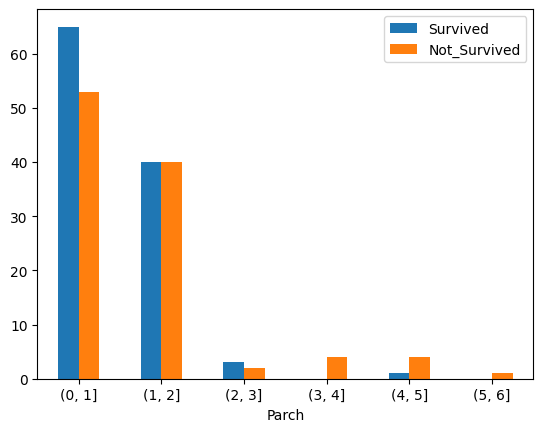

In [116]:
#Количество выживших и умерших в зависимости от количества родителей или детей, с которыми путешествовал каждый пассажир.
groups = df[df.Survived == 1].groupby(['Parch', pd.cut(df.Parch, [0, 1, 2, 3, 4, 5, 6])])
Survived = pd.DataFrame(groups.size().unstack().sum())
groups = df[df.Survived == 0].groupby(['Parch', pd.cut(df.Parch, [0, 1, 2, 3, 4, 5, 6])])
Not_Survived = pd.DataFrame(groups.size().unstack().sum())
Parch_df = pd.merge(Survived, Not_Survived, on='Parch')
Parch_df.columns = ['Survived', 'Not_Survived']
Parch_df['Parch'] = Parch_df.index.astype(str)
Parch_df.plot(kind='bar', x ='Parch', y =['Survived', 'Not_Survived'], rot=0)

<Axes: xlabel='Sex'>

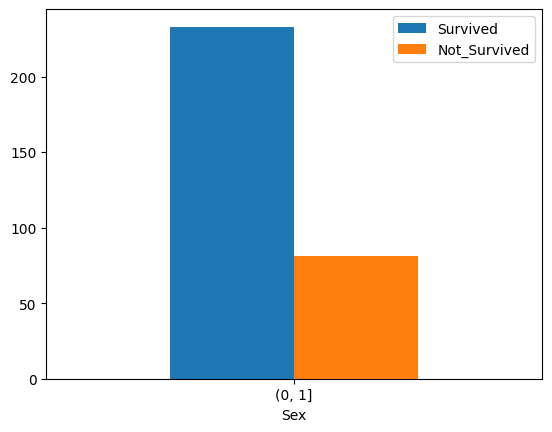

In [144]:
#Количество выживших и умерших в зависимости от пола.
df = df.replace({'Sex':{'male': 0}})
df = df.replace({'Sex':{'female': 1}})
groups = df[df.Survived == 1].groupby(['Sex', pd.cut(df.Sex, [0, 1])])
Survived = pd.DataFrame(groups.size().unstack().sum())
groups = df[df.Survived == 0].groupby(['Sex', pd.cut(df.Sex, [0, 1])])
Not_Survived = pd.DataFrame(groups.size().unstack().sum())
Sex_df = pd.merge(Survived, Not_Survived, on='Sex')
Sex_df.columns = ['Survived', 'Not_Survived']
Sex_df['Sex'] = Sex_df.index.astype(str)
Sex_df.plot(kind='bar', x ='Sex', y =['Survived', 'Not_Survived'], rot=0)